<a href="https://colab.research.google.com/github/dnals1120/practice/blob/master/vandermonde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vandermonde polynomial interpolation

This code demonstrates how to do Vandermonde polynomial interpolation of discrete points and discusses its caveats.

© Jinhyun Choo (jinhyun.choo@kaist.ac.kr)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, let's generate points to interpolate. 
Here we sample 10 equally spaced points from $\exp(x)$ within the range of $[0,1]$.

In [2]:
n_points = 10 # no. of sampling points
x = np.linspace(0,1,n_points)
y = np.exp(x)

We then calculate the coefficients of the polynomial interpolant by solving a Vandermonde system. 

We use [NumPy's vander function](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) to calculate a Vandermonde matrix.

In [12]:
matrix = np.vander(x)
coef = np.linalg.solve(matrix,y) # solving matrix*coeff = y
print(coef)

[4.56452264e-06 2.05825335e-05 2.03712931e-04 1.38485205e-03
 8.33527174e-03 4.16660819e-02 1.66666773e-01 4.99999990e-01
 1.00000000e+00 1.00000000e+00]


Calculate the interpolant with the coefficeints obtained above.
 
We can use the [poly1d function](https://numpy.org/devdocs/reference/generated/numpy.poly1d.html#numpy.poly1d) in NumPy.

In [6]:
x_interp = np.linspace(0,1,1000) # locations where we interpolate
y_interp = np.poly1d(coef)(x_interp) # interpolated values

For verification, we also calculate exact values with the function used for generating the points.

In [7]:
y_exact = np.exp(x_interp)

Let's plot out the interpolating polynomial along with the points. The exact function is also plotted for reference.

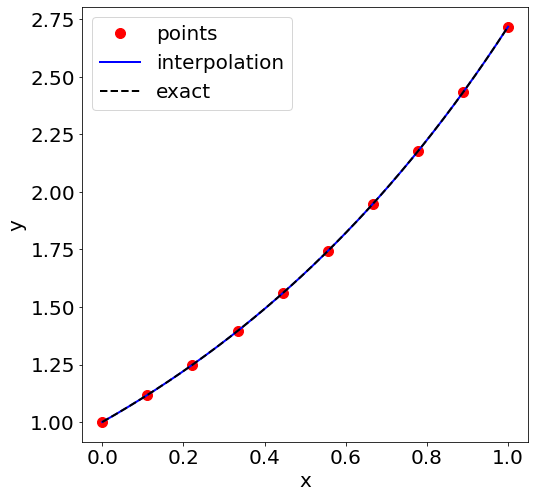

In [8]:
plt.figure(figsize=(8,8))
plt.rc('font',size=20)
plt.plot(x, y, c='red', linestyle='None', marker='o', ms=10, label="points")
plt.plot(x_interp, y_interp, c='blue', lw=2, label="interpolation")
plt.plot(x_interp, y_exact, '--', c='black', lw=2, label="exact")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Although the Vandermonde interpolation appears good, it is highly sensitive to perturbation when the number of points is rather large. 

To see whether this is true, let's perturb the values of the points, $y$. 
Such perturbation is common in practice due to errors in measurement and/or in compuatation.


In [9]:
y_perturbed = y + 1e-5*np.random.rand(n_points)


We then use the same Vandermonde matrix to calculate coefficients for interpolating the perturbed points. 

In [10]:
coef_perturbed = np.linalg.solve(matrix,y_perturbed)

Because the original and perturbed points are pretty close, one would expect that the two sets of the coefficients are similar. 

Let's see whether this is true.

In [11]:
for n in range(coef.size):
    print("%dth power coefficient from original points is %.2e; that from perturbed points is %.2e" %(coef.size-n-1,coef[n],coef_perturbed[n]))

9th power coefficient from original points is 4.56e-06; that from perturbed points is -6.73e-02
8th power coefficient from original points is 2.06e-05; that from perturbed points is 2.30e-01
7th power coefficient from original points is 2.04e-04; that from perturbed points is -2.73e-01
6th power coefficient from original points is 1.38e-03; that from perturbed points is 8.94e-02
5th power coefficient from original points is 8.34e-03; that from perturbed points is 9.35e-02
4th power coefficient from original points is 4.17e-02; that from perturbed points is -5.10e-02
3th power coefficient from original points is 1.67e-01; that from perturbed points is 2.03e-01
2th power coefficient from original points is 5.00e-01; that from perturbed points is 4.94e-01
1th power coefficient from original points is 1.00e+00; that from perturbed points is 1.00e+00
0th power coefficient from original points is 1.00e+00; that from perturbed points is 1.00e+00


As can be seen from the results above, the solution obtained from the Vandermonde system -- particularly the coefficients of high-degree terms -- is overly sensitive to perturbation. Such sensitivity is highly undesirable in numerical analysis.

The underlying reason for this sensitivity is that this approach uses monomials as the basis of polynomial calculation. The figure below shows that the monomial basis functions become increasingly similar as the power becomes higher. Thus, as the number of points increases, the Vandermonde matrix becomes close to being linear dependent.

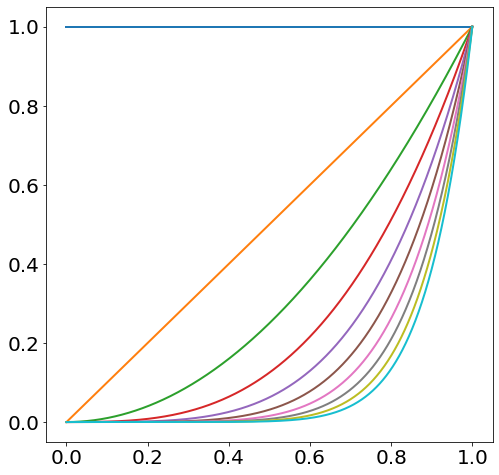

In [13]:
x_basis = np.linspace(0,1,1000)
highest_power = 10

plt.figure(figsize=(8,8))
plt.rc('font',size=20)
for i in range(highest_power):
    plt.plot(x_basis, np.power(x_basis,i), lw=2)
s
plt.show()

The sensitivity of a linear system can be quantified with the [condition number](https://en.wikipedia.org/wiki/Condition_number). (Its details are beyond the scope of this course, though.)

The code below shows that the condition number of the Vandermonde matrix increases dramatically as the matrix size becomes large.

In [ ]:
print("Condition number of the Vandermonde matrix from 10 points: %.2e" %np.linalg.cond(np.vander(np.linspace(0,1,10))))
print("Condition number of the Vandermonde matrix from 15 points: %.2e" %np.linalg.cond(np.vander(np.linspace(0,1,15))))
print("Condition number of the Vandermonde matrix from 20 points: %.2e" %np.linalg.cond(np.vander(np.linspace(0,1,20))))

## Exercise

Repeat the polynomial interpolation with 15 and 20 points, and compare how the sensitivity of the solution changes. What is the relationship between the solution sensitivity and the condition number of the Vandermonde matrix?

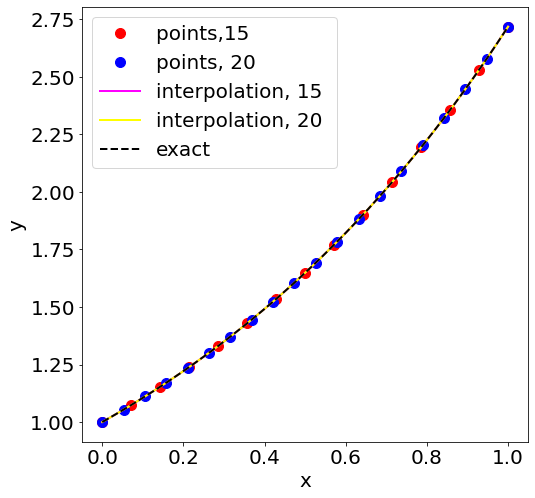

In [25]:
n_points = [15,20] # no. of sampling points
result = []
for i in range(len(n_points)):
  x = np.linspace(0,1,n_points[i])
  y = np.exp(x)

  matrix = np.vander(x)
  coef = np.linalg.solve(matrix,y) # solving matrix*coeff = y
  x_interp = np.linspace(0,1,1000) # locations where we interpolate
  y_interp = np.poly1d(coef)(x_interp) # interpolated values
  y_exact = np.exp(x_interp)

  result.append([x,y,matrix,coef,x_interp,y_interp,y_exact])


plt.figure(figsize=(8,8))
plt.rc('font',size=20)

plt.plot(result[0][0], result[0][1], c='red', linestyle='None', marker='o', ms=10, label="points,15 ")
plt.plot(result[1][0], result[1][1], c='blue', linestyle='None', marker='o', ms=10, label="points, 20")


plt.plot(result[0][4], result[0][5], c='magenta', lw=2, label="interpolation, 15")
plt.plot(result[1][4], result[1][5], c='yellow', lw=2, label="interpolation, 20 ")


plt.plot(result[0][4], result[0][6], '--', c='black', lw=2, label="exact")
# plt.plot(result[1][4], result[1][6], '--', c='black', lw=2, label="exact")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [20]:
print("Condition number of the Vandermonde matrix from 15 points: %.2e" %np.linalg.cond(np.vander(np.linspace(0,1,15))))
print("Condition number of the Vandermonde matrix from 20 points: %.2e" %np.linalg.cond(np.vander(np.linspace(0,1,20))))

Condition number of the Vandermonde matrix from 15 points: 4.03e+11
Condition number of the Vandermonde matrix from 20 points: 1.12e+16


In [ ]:
F